## Test out how to edit on 2_Spurious_MNIST dataset

In [1]:
# General imports
import torch
import numpy as np
import os, sys
import json
from tqdm import tqdm
from datetime import datetime
import pandas as pd
import shutil

In [2]:
# Local imports
sys.path.insert(0, 'src')
from utils import read_json, read_lists, informal_log, list_to_dict, write_lists, write_json, save_image
from utils.visualizations import show_image_rows, make_grid
from utils.model_utils import prepare_device
from parse_config import ConfigParser
# from data_loader import data_loaders
import datasets.datasets as module_data
import datasets.edit_datasets as module_edit_data
import model.model as module_arch
from utils.knn_utils import load_and_analyze_knn
from utils.results_to_csv import store_csv
from edit_MNIST import edit, run_trials

In [3]:
# Define constants, paths
dataset_type = '2_Spurious_MNIST'
config_path = os.path.join('configs', 'MNIST', '{}_edit.json'.format(dataset_type))
config_dict = read_json(config_path)
class_list = [i for i in range(10)]

analyze_in_edit = True



In [4]:
# Load config file
config = ConfigParser(config_dict)

# Set K
K = config_dict['editor']['K']

device, device_ids = prepare_device(config_dict['n_gpu'])

In [5]:
# Load datasets
data_loader_args = dict(config_dict["data_loader"]["args"])

# Create validation data loader
test_dataset =config.init_obj('test_dataset', module_data)

test_data_loader = torch.utils.data.DataLoader(
    test_dataset,
    **data_loader_args
)

# Create data loader for covariance matrix
covariance_dataset = config.init_obj('covariance_dataset', module_data)
covariance_data_loader = torch.utils.data.DataLoader(
    covariance_dataset,
    **data_loader_args
)


### Create log and save paths

In [6]:
# create log path to store the paths to each trial
save_root = config_dict['trainer']['save_dir']
timestamp = os.path.basename(os.path.dirname(config.save_dir))
save_dir = os.path.join(save_root, config_dict['name'], timestamp)
trial_paths_path = os.path.join(save_dir, 'trial_paths.txt')
progress_report_path = os.path.join(save_dir, 'progress_report.txt')
if os.path.exists(trial_paths_path):
    print("Path {} already exists. Aborting.".format(trial_paths_path))
else:
    # progress_report_path = os.path.join(save_root, config_dict['name'], timestamp, 'progress_report.txt')
    if os.path.exists(progress_report_path):
        os.remove(progress_report_path)
    print("Saving path to directories for each trial to {}".format(trial_paths_path))
    print("Printing progress reports to {}".format(progress_report_path))

Saving path to directories for each trial to saved/edit_2_Spurious_MNIST/method_eac/VGG_16/0321_145522/trial_paths.txt
Printing progress reports to saved/edit_2_Spurious_MNIST/method_eac/VGG_16/0321_145522/progress_report.txt


### Create dataset and save edit_idxs file

In [7]:

MNIST_edit_dataset = config.init_obj('edit_dataset', module_edit_data)
edit_data_loader = torch.utils.data.DataLoader(
    MNIST_edit_dataset,
    shuffle=False,
    batch_size=1,
    num_workers=8
)
# Save edit_idxs
edit_idxs_src_path = MNIST_edit_dataset.edit_idxs_path
edit_idxs_dst_path = os.path.join(save_dir, os.path.basename(edit_idxs_src_path))
shutil.copyfile(edit_idxs_src_path, edit_idxs_dst_path)
print("Saved edit_idxs file to {}".format(edit_idxs_dst_path))

Saved edit_idxs file to saved/edit_2_Spurious_MNIST/method_eac/VGG_16/0321_145522/edit_idxs.txt


### Run Trials


(0321_145531) Starting Trial 1/3...
saved/edit_2_Spurious_MNIST/method_eac/VGG_16/0321_145522/results/edit_idx_0
torch.Size([1, 1, 32, 32])
3 1


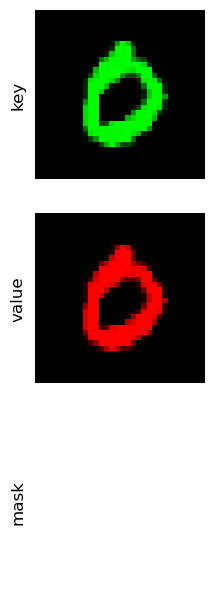

Seed: 0
Editing layer 12
Created ModelWrapperSanturkar model with 33646666 trainable parameters
Restored weights from saved/train/2_Spurious_MNIST-VGG_16/0317_134644/models/model_best.pth
Using passed in data loader for validation.
Performing pre-edit metric calculations on validation set.


100%|███████████████████████████████████████████████████████████| 38/38 [00:02<00:00, 17.04it/s]

Pre-edit metrics: {'TP': array([448, 537, 520, 498, 452, 423, 437, 473, 454, 454]), 'TN': array([8326, 8375, 8215, 7553, 7786, 8244, 8367, 7920, 7888, 8022]), 'FPs': array([244,  40, 303, 987, 782, 414, 225, 602, 688, 519]), 'FNs': array([482, 548, 462, 462, 480, 419, 471, 505, 470, 505]), 'accuracy': 0.4943157894736842, 'per_class_accuracy': array([0.92357895, 0.93810526, 0.91947368, 0.84747368, 0.86715789,
       0.91231579, 0.92673684, 0.88347368, 0.87810526, 0.89221053]), 'per_class_accuracy_mean': 0.8988631578947368, 'precision': array([0.64739884, 0.93067591, 0.63183475, 0.33535354, 0.36628849,
       0.50537634, 0.66012085, 0.44      , 0.39754816, 0.46659815]), 'precision_mean': 0.53811950339605, 'recall': array([0.48172043, 0.49493088, 0.52953157, 0.51875   , 0.48497854,
       0.5023753 , 0.48127753, 0.48364008, 0.49134199, 0.4734098 ]), 'recall_mean': 0.4941956119654501, 'predicted_class_distribution': array([ 692,  577,  823, 1485, 1234,  837,  662, 1075, 1142,  973]), 'f1':

Looking for covariance matrix weights in cache/2_Spurious_MNIST_hold_out/vgg16_bn-12
Found precomputed cov matrices, returning...


tensor(0.1473, device='cuda:0', grad_fn=<DivBackward0>): 100%|█| 40000/40000 [00:48<00:00, 818.5


Loss (orig, final): 1.2179887294769287 0.14726069569587708
L2 norm of weight change: 4.148594379425049
Performing post-edit metric calculations on validation set.


100%|███████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 25.45it/s]

Post-edit metrics: {'TP': array([448, 537, 520, 498, 452, 422, 436, 473, 454, 454]), 'TN': array([8317, 8376, 8213, 7561, 7788, 8237, 8376, 7919, 7885, 8022]), 'FPs': array([253,  39, 305, 979, 780, 421, 216, 603, 691, 519]), 'FNs': array([482, 548, 462, 462, 480, 420, 472, 505, 470, 505]), 'accuracy': 0.4941052631578947, 'per_class_accuracy': array([0.92263158, 0.93821053, 0.91926316, 0.84831579, 0.86736842,
       0.91147368, 0.92757895, 0.88336842, 0.87778947, 0.89221053]), 'per_class_accuracy_mean': 0.898821052631579, 'precision': array([0.63908702, 0.93229167, 0.63030303, 0.33716994, 0.36688312,
       0.50059312, 0.66871166, 0.43959108, 0.39650655, 0.46659815]), 'precision_mean': 0.5377735326051984, 'recall': array([0.48172043, 0.49493088, 0.52953157, 0.51875   , 0.48497854,
       0.50118765, 0.48017621, 0.48364008, 0.49134199, 0.4734098 ]), 'recall_mean': 0.4939667149612541, 'predicted_class_distribution': array([ 701,  576,  825, 1477, 1232,  843,  652, 1076, 1145,  973]), 'f1

saved/edit_2_Spurious_MNIST/method_eac/VGG_16/0321_145522/results/edit_idx_1
torch.Size([2, 1, 32, 32])
3 2


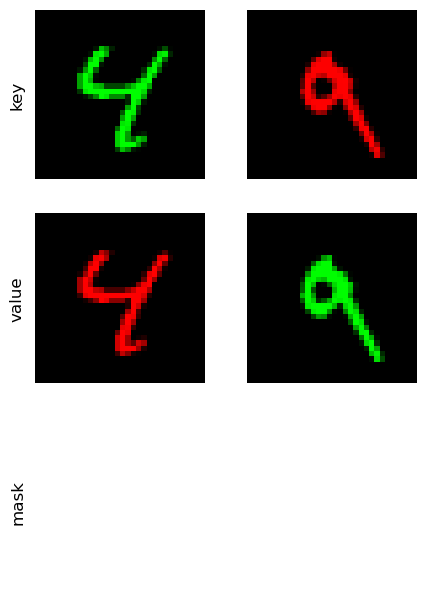

Seed: 0
Editing layer 12
Created ModelWrapperSanturkar model with 33646666 trainable parameters
Restored weights from saved/train/2_Spurious_MNIST-VGG_16/0317_134644/models/model_best.pth
Using passed in data loader for validation.
Performing pre-edit metric calculations on validation set.


100%|███████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 25.63it/s]

Pre-edit metrics: {'TP': array([448, 537, 520, 498, 452, 423, 437, 473, 454, 454]), 'TN': array([8326, 8375, 8215, 7553, 7786, 8244, 8367, 7920, 7888, 8022]), 'FPs': array([244,  40, 303, 987, 782, 414, 225, 602, 688, 519]), 'FNs': array([482, 548, 462, 462, 480, 419, 471, 505, 470, 505]), 'accuracy': 0.4943157894736842, 'per_class_accuracy': array([0.92357895, 0.93810526, 0.91947368, 0.84747368, 0.86715789,
       0.91231579, 0.92673684, 0.88347368, 0.87810526, 0.89221053]), 'per_class_accuracy_mean': 0.8988631578947368, 'precision': array([0.64739884, 0.93067591, 0.63183475, 0.33535354, 0.36628849,
       0.50537634, 0.66012085, 0.44      , 0.39754816, 0.46659815]), 'precision_mean': 0.53811950339605, 'recall': array([0.48172043, 0.49493088, 0.52953157, 0.51875   , 0.48497854,
       0.5023753 , 0.48127753, 0.48364008, 0.49134199, 0.4734098 ]), 'recall_mean': 0.4941956119654501, 'predicted_class_distribution': array([ 692,  577,  823, 1485, 1234,  837,  662, 1075, 1142,  973]), 'f1':

Found precomputed cov matrices, returning...


tensor(0.1111, device='cuda:0', grad_fn=<DivBackward0>): 100%|█| 40000/40000 [00:48<00:00, 823.7


Loss (orig, final): 1.1168369054794312 0.11109685152769089
L2 norm of weight change: 10.81692123413086
Performing post-edit metric calculations on validation set.


100%|███████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 25.57it/s]

Post-edit metrics: {'TP': array([448, 537, 520, 498, 451, 422, 436, 471, 454, 455]), 'TN': array([8322, 8376, 8217, 7542, 7798, 8256, 8358, 7931, 7875, 8017]), 'FPs': array([248,  39, 301, 998, 770, 402, 234, 591, 701, 524]), 'FNs': array([482, 548, 462, 462, 481, 420, 472, 507, 470, 504]), 'accuracy': 0.4938947368421053, 'per_class_accuracy': array([0.92315789, 0.93821053, 0.91968421, 0.84631579, 0.86831579,
       0.91347368, 0.92568421, 0.88442105, 0.87673684, 0.89178947]), 'per_class_accuracy_mean': 0.8987789473684211, 'precision': array([0.64367816, 0.93229167, 0.63337393, 0.3328877 , 0.36936937,
       0.51213592, 0.65074627, 0.44350282, 0.39307359, 0.46475996]), 'precision_mean': 0.5375819399778033, 'recall': array([0.48172043, 0.49493088, 0.52953157, 0.51875   , 0.48390558,
       0.50118765, 0.48017621, 0.48159509, 0.49134199, 0.47445255]), 'recall_mean': 0.49375919513316696, 'predicted_class_distribution': array([ 696,  576,  821, 1496, 1221,  824,  670, 1062, 1155,  979]), '

Saved post-edit metrics saved/edit_2_Spurious_MNIST/method_eac/VGG_16/0321_145522/results/edit_idx_1/models/post_edit_metrics.pth
Saved post-edit logits to saved/edit_2_Spurious_MNIST/method_eac/VGG_16/0321_145522/results/edit_idx_1/models/post_edit_logits.pth
All metrics and KNN results can be found in saved/edit_2_Spurious_MNIST/method_eac/VGG_16/0321_145522/results/edit_idx_1/models
(0321_145720) Starting Trial 3/3...
saved/edit_2_Spurious_MNIST/method_eac/VGG_16/0321_145522/results/edit_idx_2
torch.Size([3, 1, 32, 32])
3 3


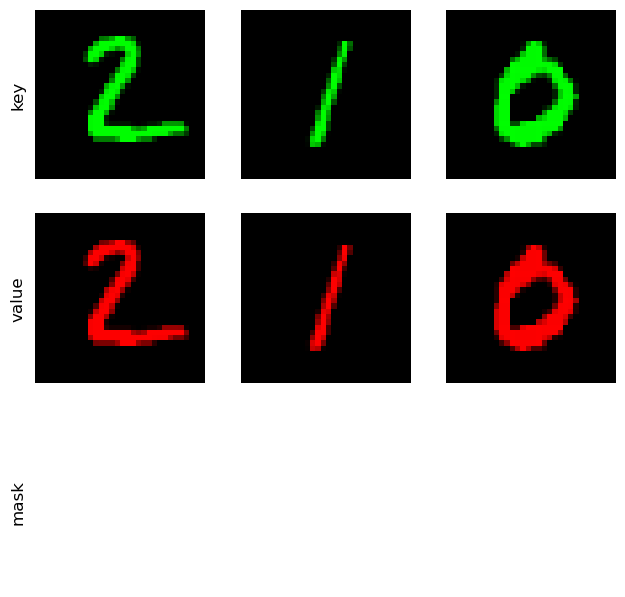

Seed: 0
Editing layer 12
Created ModelWrapperSanturkar model with 33646666 trainable parameters
Restored weights from saved/train/2_Spurious_MNIST-VGG_16/0317_134644/models/model_best.pth
Using passed in data loader for validation.
Performing pre-edit metric calculations on validation set.


100%|███████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 25.84it/s]

Pre-edit metrics: {'TP': array([448, 537, 520, 498, 452, 423, 437, 473, 454, 454]), 'TN': array([8326, 8375, 8215, 7553, 7786, 8244, 8367, 7920, 7888, 8022]), 'FPs': array([244,  40, 303, 987, 782, 414, 225, 602, 688, 519]), 'FNs': array([482, 548, 462, 462, 480, 419, 471, 505, 470, 505]), 'accuracy': 0.4943157894736842, 'per_class_accuracy': array([0.92357895, 0.93810526, 0.91947368, 0.84747368, 0.86715789,
       0.91231579, 0.92673684, 0.88347368, 0.87810526, 0.89221053]), 'per_class_accuracy_mean': 0.8988631578947368, 'precision': array([0.64739884, 0.93067591, 0.63183475, 0.33535354, 0.36628849,
       0.50537634, 0.66012085, 0.44      , 0.39754816, 0.46659815]), 'precision_mean': 0.53811950339605, 'recall': array([0.48172043, 0.49493088, 0.52953157, 0.51875   , 0.48497854,
       0.5023753 , 0.48127753, 0.48364008, 0.49134199, 0.4734098 ]), 'recall_mean': 0.4941956119654501, 'predicted_class_distribution': array([ 692,  577,  823, 1485, 1234,  837,  662, 1075, 1142,  973]), 'f1':

Saved pre-edit logits to saved/edit_2_Spurious_MNIST/method_eac/VGG_16/0321_145522/results/edit_idx_2/models/pre_edit_logits.pth
Created <class 'trainer.editor.EditorEAC'> editor.
Is covariance_dataset in config? True
Created dataloader for covariance matrix from 2_Spurious_MNIST_hold_out
Looking for covariance matrix weights in cache/2_Spurious_MNIST_hold_out/vgg16_bn-12
Found precomputed cov matrices, returning...


tensor(0.0897, device='cuda:0', grad_fn=<DivBackward0>): 100%|█| 40000/40000 [00:48<00:00, 819.7


Loss (orig, final): 0.9827195405960083 0.08967384696006775
L2 norm of weight change: 3.370163679122925
Performing post-edit metric calculations on validation set.


100%|███████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 25.69it/s]

Post-edit metrics: {'TP': array([448, 537, 522, 498, 452, 423, 437, 473, 454, 454]), 'TN': array([8321, 8376, 8228, 7548, 7783, 8243, 8364, 7916, 7894, 8025]), 'FPs': array([249,  39, 290, 992, 785, 415, 228, 606, 682, 516]), 'FNs': array([482, 548, 460, 462, 480, 419, 471, 505, 470, 505]), 'accuracy': 0.4945263157894737, 'per_class_accuracy': array([0.92305263, 0.93821053, 0.92105263, 0.84694737, 0.86684211,
       0.91221053, 0.92642105, 0.88305263, 0.87873684, 0.89252632]), 'per_class_accuracy_mean': 0.8989052631578947, 'precision': array([0.64275466, 0.93229167, 0.64285714, 0.33422819, 0.36540016,
       0.50477327, 0.65714286, 0.43836886, 0.39964789, 0.46804124]), 'precision_mean': 0.5385505933291054, 'recall': array([0.48172043, 0.49493088, 0.53156823, 0.51875   , 0.48497854,
       0.5023753 , 0.48127753, 0.48364008, 0.49134199, 0.4734098 ]), 'recall_mean': 0.49439927795323013, 'predicted_class_distribution': array([ 697,  576,  812, 1490, 1237,  838,  665, 1079, 1136,  970]), '

In [8]:
run_trials(
    edit_data_loader=edit_data_loader,
    progress_report_path=progress_report_path,
    trial_paths_path=trial_paths_path,
    test_data_loader=test_data_loader,
    # covariance_data_loader=covariance_data_loader,
    config_dict=config_dict,
    run_id_prefix=os.path.join(timestamp),
    debug=True,
    seed=0)


### Run experiments varying some variable

In [45]:
def get_nested_dict_value(keys: list,
                          dictionary: dict):
    
    # Base case
    if len(keys) == 1:
        try:
            return dictionary[keys[0]]
        except:
            print("in except")
            return None
    else:
        try:
            item = dictionary[keys[0]]
            return get_nested_dict_value(
                keys=keys[1:],
                dictionary=item)
        except:
            print("in except")
            return None
        
def set_nested_dict_value(keys: list,
                          dictionary: dict,
                          value: any):
    '''
    DOES change the original dictionary
    '''
    
    # Base case
    if len(keys) == 1:
        dictionary[keys[0]] = value
        return True
    else:
        try:
            item = dictionary[keys[0]]
            if not isinstance(item, dict):
                return False
            else:
                return set_nested_dict_value(
                    keys=keys[1:],
                    dictionary=item,
                    value=value)
        except:
            print("in except")
            return False

def run_experiments(iv_path: str,
                    iv_values: list,
                    edit_data_loader: list,
                    progress_report_path: str,
                    trial_paths_path: str,
                    timestamp: str,
                    config_dict: dict,
                    test_data_loader=None,
                    covariance_data_loader=None,
                    analyze_in_edit=True,
                    debug=True,
                    seed: int=0):
    
    # TODO: this may need to be modified if IV is a nested key
    iv_path_list = iv_path.split('/')
    
    if get_nested_dict_value(keys=iv_path_list, dictionary=config_dict) is None:
        raise ValueError("Could not find path of keys {} in config dictionary".format(iv_path))

    n_experiments = len(iv_values)
    for iv_idx, iv_value in enumerate(iv_values):
        # config_dict[iv_name] = iv_value
        if not set_nested_dict_value(
            keys=iv_path_list,
            dictionary=config_dict,
            value=iv_value):
            raise ValueError("Unable to set value of {} to {}".format(iv_path, iv_value))
        informal_log("Experimenting with {} of {}".format(iv_path, iv_value), progress_report_path)
        
        run_id_prefix = os.path.join(timestamp, '{}_{}'.format(iv_path.replace('/', '_'), iv_value))
        # run_trials(
        #     EAC_edit_data=EAC_edit_data,
        #     progress_report_path=progress_report_path,
        #     trial_paths_path=trial_paths_path,
        #     config_dict=config_dict,
        #     run_id_prefix=run_id_prefix,
        #     debug=debug)
        
        run_trials(
            edit_data_loader=edit_data_loader,
            test_data_loader=test_data_loader,
            covariance_data_loader=covariance_data_loader,
            config_dict=config_dict,
            run_id_prefix=run_id_prefix,
            progress_report_path=progress_report_path,
            trial_paths_path=trial_paths_path,
            debug=debug,
            analyze_in_edit=analyze_in_edit,
            seed=seed)
            

#### Run experiments varying layer number

Varying layernum with following values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Experimenting with layernum of 1
(0321_144302) Starting Trial 1/3...
saved/edit_2_Spurious_MNIST/method_eac/debug/VGG_16-layernum/0321_142034/layernum_1/results/edit_idx_0
torch.Size([1, 1, 32, 32])
3 1


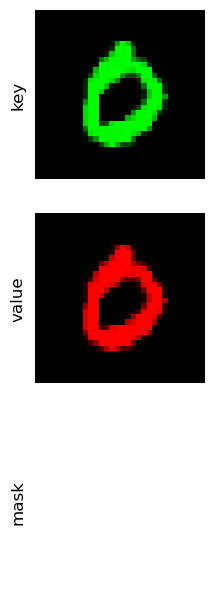

Seed: 0
Editing layer 1
Created ModelWrapperSanturkar model with 33646666 trainable parameters
Restored weights from saved/train/2_Spurious_MNIST-VGG_16/0317_134644/models/model_best.pth
Using passed in data loader for validation.
Performing pre-edit metric calculations on validation set.


100%|███████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 24.78it/s]


Pre-edit metrics: {'TP': array([448, 537, 520, 498, 452, 423, 437, 473, 454, 454]), 'TN': array([8326, 8375, 8215, 7553, 7786, 8244, 8367, 7920, 7888, 8022]), 'FPs': array([244,  40, 303, 987, 782, 414, 225, 602, 688, 519]), 'FNs': array([482, 548, 462, 462, 480, 419, 471, 505, 470, 505]), 'accuracy': 0.4943157894736842, 'per_class_accuracy': array([0.92357895, 0.93810526, 0.91947368, 0.84747368, 0.86715789,
       0.91231579, 0.92673684, 0.88347368, 0.87810526, 0.89221053]), 'per_class_accuracy_mean': 0.8988631578947368, 'precision': array([0.64739884, 0.93067591, 0.63183475, 0.33535354, 0.36628849,
       0.50537634, 0.66012085, 0.44      , 0.39754816, 0.46659815]), 'precision_mean': 0.53811950339605, 'recall': array([0.48172043, 0.49493088, 0.52953157, 0.51875   , 0.48497854,
       0.5023753 , 0.48127753, 0.48364008, 0.49134199, 0.4734098 ]), 'recall_mean': 0.4941956119654501, 'predicted_class_distribution': array([ 692,  577,  823, 1485, 1234,  837,  662, 1075, 1142,  973]), 'f1':

tensor(1.0251, device='cuda:0', grad_fn=<DivBackward0>): 100%|█| 40000/40000 [00:52<00:00, 760.1


Loss (orig, final): 0.43151694536209106 1.025132656097412
L2 norm of weight change: 40.20195007324219
Performing post-edit metric calculations on validation set.


100%|███████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 24.74it/s]

Post-edit metrics: {'TP': array([448, 534, 611, 844, 453,  69, 116,  90, 134,  41]), 'TN': array([8366, 8397, 8112, 4626, 7874, 8606, 8510, 8462, 7867, 8520]), 'FPs': array([ 204,   18,  406, 3914,  694,   52,   82,   60,  709,   21]), 'FNs': array([482, 551, 371, 116, 479, 773, 792, 888, 790, 918]), 'accuracy': 0.35157894736842105, 'per_class_accuracy': array([0.92778947, 0.94010526, 0.91821053, 0.57578947, 0.87652632,
       0.91315789, 0.908     , 0.90021053, 0.84221053, 0.90115789]), 'per_class_accuracy_mean': 0.8703157894736842, 'precision': array([0.68711656, 0.9673913 , 0.60078663, 0.17738546, 0.39494333,
       0.57024793, 0.58585859, 0.6       , 0.15895611, 0.66129032]), 'precision_mean': 0.5403976234059058, 'recall': array([0.48172043, 0.4921659 , 0.62219959, 0.87916667, 0.4860515 ,
       0.08194774, 0.1277533 , 0.09202454, 0.14502165, 0.04275287]), 'recall_mean': 0.34508041901076747, 'predicted_class_distribution': array([ 652,  552, 1017, 4758, 1147,  121,  198,  150,  843

Saved post-edit logits to saved/edit_2_Spurious_MNIST/method_eac/debug/VGG_16-layernum/0321_142034/layernum_1/results/edit_idx_0/models/post_edit_logits.pth
All metrics and KNN results can be found in saved/edit_2_Spurious_MNIST/method_eac/debug/VGG_16-layernum/0321_142034/layernum_1/results/edit_idx_0/models
(0321_144400) Starting Trial 2/3...
saved/edit_2_Spurious_MNIST/method_eac/debug/VGG_16-layernum/0321_142034/layernum_1/results/edit_idx_1
torch.Size([2, 1, 32, 32])
3 2


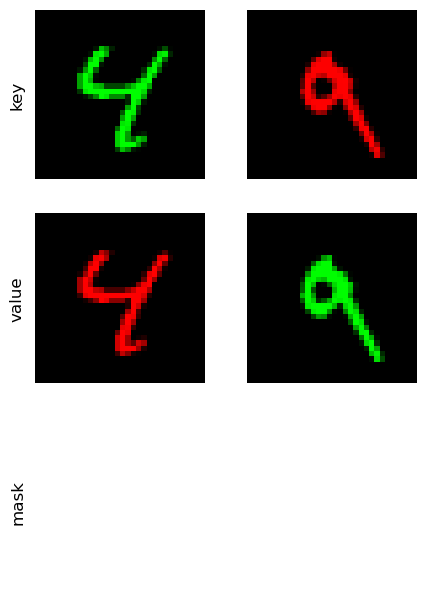

Seed: 0
Editing layer 1
Created ModelWrapperSanturkar model with 33646666 trainable parameters
Restored weights from saved/train/2_Spurious_MNIST-VGG_16/0317_134644/models/model_best.pth
Using passed in data loader for validation.
Performing pre-edit metric calculations on validation set.


100%|███████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 25.62it/s]


Pre-edit metrics: {'TP': array([448, 537, 520, 498, 452, 423, 437, 473, 454, 454]), 'TN': array([8326, 8375, 8215, 7553, 7786, 8244, 8367, 7920, 7888, 8022]), 'FPs': array([244,  40, 303, 987, 782, 414, 225, 602, 688, 519]), 'FNs': array([482, 548, 462, 462, 480, 419, 471, 505, 470, 505]), 'accuracy': 0.4943157894736842, 'per_class_accuracy': array([0.92357895, 0.93810526, 0.91947368, 0.84747368, 0.86715789,
       0.91231579, 0.92673684, 0.88347368, 0.87810526, 0.89221053]), 'per_class_accuracy_mean': 0.8988631578947368, 'precision': array([0.64739884, 0.93067591, 0.63183475, 0.33535354, 0.36628849,
       0.50537634, 0.66012085, 0.44      , 0.39754816, 0.46659815]), 'precision_mean': 0.53811950339605, 'recall': array([0.48172043, 0.49493088, 0.52953157, 0.51875   , 0.48497854,
       0.5023753 , 0.48127753, 0.48364008, 0.49134199, 0.4734098 ]), 'recall_mean': 0.4941956119654501, 'predicted_class_distribution': array([ 692,  577,  823, 1485, 1234,  837,  662, 1075, 1142,  973]), 'f1':

tensor(0.2893, device='cuda:0', grad_fn=<DivBackward0>): 100%|█| 40000/40000 [00:52<00:00, 758.4


Loss (orig, final): 0.3294457793235779 0.2893000543117523
L2 norm of weight change: 40.736671447753906
Performing post-edit metric calculations on validation set.


100%|███████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 25.21it/s]

Post-edit metrics: {'TP': array([408, 464, 477, 496, 442, 416, 432, 468, 452, 448]), 'TN': array([8422, 8412, 8144, 6981, 8128, 8283, 8406, 8037, 7619, 8071]), 'FPs': array([ 148,    3,  374, 1559,  440,  375,  186,  485,  957,  470]), 'FNs': array([522, 621, 505, 464, 490, 426, 476, 510, 472, 511]), 'accuracy': 0.474, 'per_class_accuracy': array([0.92947368, 0.93431579, 0.90747368, 0.78705263, 0.90210526,
       0.91568421, 0.93031579, 0.89526316, 0.84957895, 0.89673684]), 'per_class_accuracy_mean': 0.8947999999999998, 'precision': array([0.73381295, 0.99357602, 0.56051704, 0.24136253, 0.50113379,
       0.52591656, 0.69902913, 0.4910808 , 0.32079489, 0.48801743]), 'precision_mean': 0.5555241127007339, 'recall': array([0.43870968, 0.42764977, 0.48574338, 0.51666667, 0.47424893,
       0.49406176, 0.47577093, 0.47852761, 0.48917749, 0.46715328]), 'recall_mean': 0.4747709485606132, 'predicted_class_distribution': array([ 556,  467,  851, 2055,  882,  791,  618,  953, 1409,  918]), 'f1':

Saved post-edit metrics saved/edit_2_Spurious_MNIST/method_eac/debug/VGG_16-layernum/0321_142034/layernum_1/results/edit_idx_1/models/post_edit_metrics.pth
Saved post-edit logits to saved/edit_2_Spurious_MNIST/method_eac/debug/VGG_16-layernum/0321_142034/layernum_1/results/edit_idx_1/models/post_edit_logits.pth
All metrics and KNN results can be found in saved/edit_2_Spurious_MNIST/method_eac/debug/VGG_16-layernum/0321_142034/layernum_1/results/edit_idx_1/models
(0321_144458) Starting Trial 3/3...
saved/edit_2_Spurious_MNIST/method_eac/debug/VGG_16-layernum/0321_142034/layernum_1/results/edit_idx_2
torch.Size([3, 1, 32, 32])
3 3


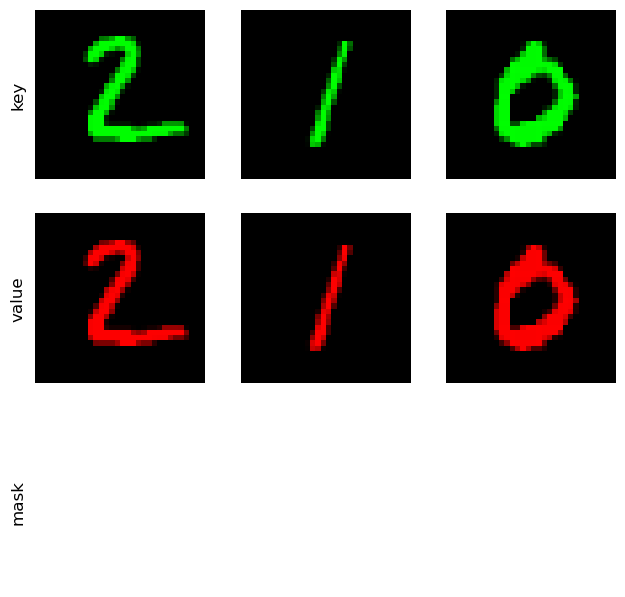

Seed: 0
Editing layer 1
Created ModelWrapperSanturkar model with 33646666 trainable parameters
Restored weights from saved/train/2_Spurious_MNIST-VGG_16/0317_134644/models/model_best.pth
Using passed in data loader for validation.
Performing pre-edit metric calculations on validation set.


100%|███████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 25.11it/s]

Pre-edit metrics: {'TP': array([448, 537, 520, 498, 452, 423, 437, 473, 454, 454]), 'TN': array([8326, 8375, 8215, 7553, 7786, 8244, 8367, 7920, 7888, 8022]), 'FPs': array([244,  40, 303, 987, 782, 414, 225, 602, 688, 519]), 'FNs': array([482, 548, 462, 462, 480, 419, 471, 505, 470, 505]), 'accuracy': 0.4943157894736842, 'per_class_accuracy': array([0.92357895, 0.93810526, 0.91947368, 0.84747368, 0.86715789,
       0.91231579, 0.92673684, 0.88347368, 0.87810526, 0.89221053]), 'per_class_accuracy_mean': 0.8988631578947368, 'precision': array([0.64739884, 0.93067591, 0.63183475, 0.33535354, 0.36628849,
       0.50537634, 0.66012085, 0.44      , 0.39754816, 0.46659815]), 'precision_mean': 0.53811950339605, 'recall': array([0.48172043, 0.49493088, 0.52953157, 0.51875   , 0.48497854,
       0.5023753 , 0.48127753, 0.48364008, 0.49134199, 0.4734098 ]), 'recall_mean': 0.4941956119654501, 'predicted_class_distribution': array([ 692,  577,  823, 1485, 1234,  837,  662, 1075, 1142,  973]), 'f1':

Found precomputed cov matrices, returning...


tensor(0.6366, device='cuda:0', grad_fn=<DivBackward0>):  94%|▉| 37499/40000 [00:49<00:03, 759.5


KeyboardInterrupt: 

In [46]:
iv_path = 'layernum'
iv_values = [i for i in range(1, 13)]
print("Varying {} with following values: {}".format(iv_path, iv_values))

run_experiments(
    iv_path=iv_path,
    iv_values=iv_values,
    edit_data_loader=edit_data_loader,
    progress_report_path=progress_report_path,
    trial_paths_path=trial_paths_path,
    timestamp=timestamp,
    config_dict=config_dict,
    covariance_data_loader=covariance_data_loader,
    test_data_loader=test_data_loader,
    analyze_in_edit=True,
    debug=True,
    seed=0)